In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from ipywidgets import interact
import pickle
import math
import os
from scipy.interpolate import interp1d


plt.rcParams['figure.dpi'] = 200

In [3]:
data_dir = "/Users/davidnull/phd/data/robosoft_fig5/"
data_dir_m1 = data_dir + "/m1/"
data_dir_m2 = data_dir + "/m2/"

m1_data_files = []
m2_data_files = []

In [4]:
for filename in os.listdir(data_dir_m1):
    if "Manual" in filename:
        exp_data_file = data_dir_m1 + "/" + filename + "/control_data_-9_25.csv"
        m1_data_files.append(exp_data_file)
for filename in os.listdir(data_dir_m2):
    if "Manual" in filename:
        exp_data_file = data_dir_m2 + "/" + filename + "/control_data_-9_25.csv"
        m2_data_files.append(exp_data_file)
print(m1_data_files)
print(m2_data_files)

['/Users/davidnull/phd/data/robosoft_fig5//m1//Manual IDX0 15-28-23 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m1//Manual IDX0 15-31-54 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m1//Manual IDX0 15-25-10 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m1//Manual IDX0 15-21-57 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m1//Manual IDX0 15-36-13 2-22-2023/control_data_-9_25.csv']
['/Users/davidnull/phd/data/robosoft_fig5//m2//Manual IDX0 15-1-37 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m2//Manual IDX0 15-4-48 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m2//Manual IDX0 15-18-19 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m2//Manual IDX0 14-55-18 2-22-2023/control_data_-9_25.csv', '/Users/davidnull/phd/data/robosoft_fig5//m2//Manual IDX0 15-9-9 2-22-2023/control

In [5]:
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

def get_minvalue(inputlist):
    #get the minimum value in the list
    min_value = min(inputlist)
    #return the index of minimum value 
    min_index=inputlist.index(min_value)
    return min_index

[ 0.2  1.2  2.2  3.2  4.2  5.2  6.2  7.2  8.2  9.2 10.2 11.2 12.2 13.2
 14.2 15.2 16.2 17.2 18.2 19.2 20.2]


Text(0, 0.5, 'Angle from Vertical (degrees)')

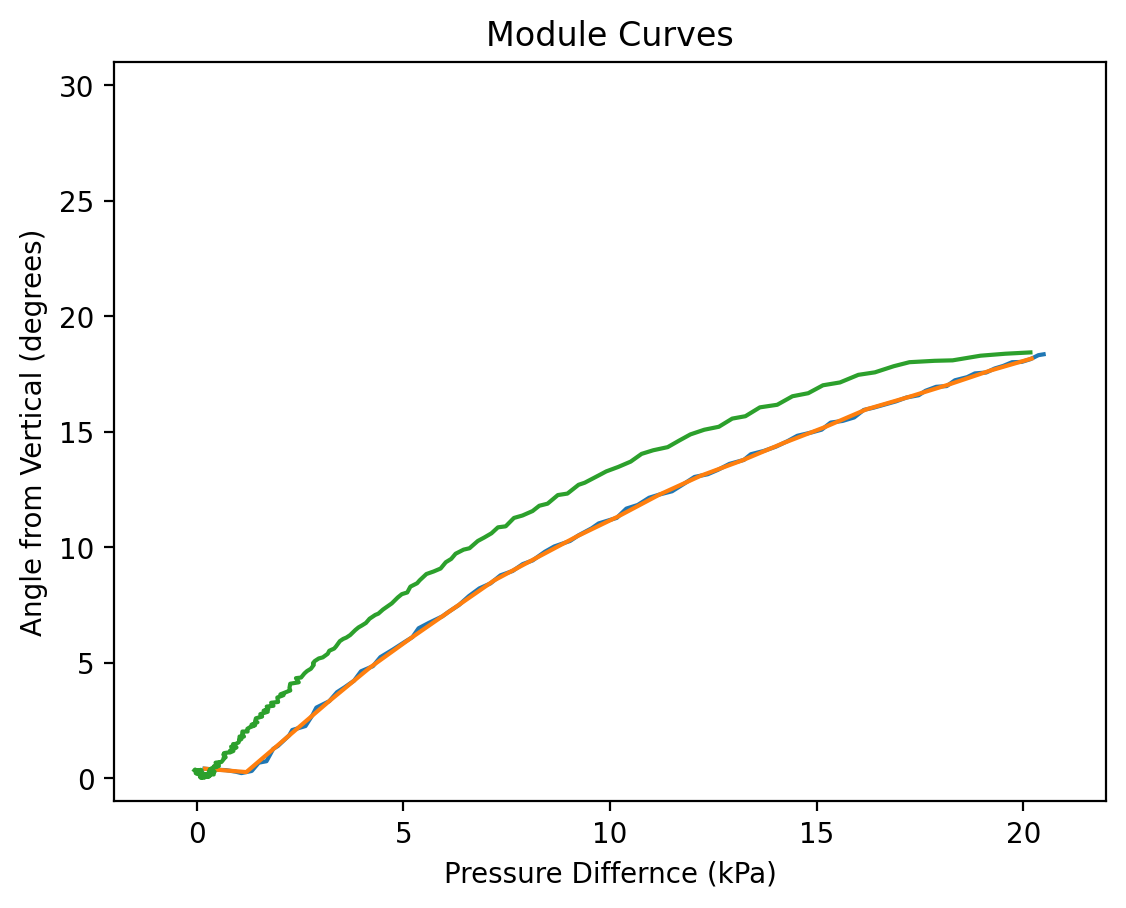

In [6]:
module = 2

all_data = [[],[]]

if module == 1:
    df = pd.read_csv(m1_data_files[3])
    mod_pfx = "M1"
    marker = "5"
elif module == 2:
    df = pd.read_csv(m2_data_files[3])
    mod_pfx = "M2"
    marker = "10"

pd_data_list = []
theta_data_list = []

for i in range(2):
    if i == 0:
        valve = mod_pfx + "-AR-IN"
    else:
        valve = mod_pfx + "-AR-OUT"

    groups = df[df[valve] == True].groupby((df[valve] != True).cumsum()).groups
    on_data_idxs = max(groups.values(), key=len)
    on_data = df.iloc[on_data_idxs]

    pd_data = (on_data[mod_pfx + "-PR"] - on_data[mod_pfx + "-PL"]).to_numpy()
    ratio_data = on_data["M" + marker + "X"].div(on_data["M" + marker + "Y"]).abs()
    theta_data = list(np.degrees(np.arctan(ratio_data)).to_numpy())

    pd_data_list.append(pd_data)
    theta_data_list.append(theta_data)

interp_func = interp1d(pd_data_list[0], theta_data_list[0])

new_x = np.arange(round_up(min(pd_data_list[0]),1), round_down(max(pd_data_list[0]),1), 1)
print(new_x)
newarr = interp_func(new_x)

plt.plot(pd_data_list[0], theta_data_list[0])
plt.plot(new_x, newarr)
plt.plot(pd_data_list[1], theta_data_list[1])
plt.xlim((-2,22))
plt.ylim((-1,31))
plt.title("Module Curves")
plt.xlabel("Pressure Differnce (kPa)")
plt.ylabel("Angle from Vertical (degrees)")


3857.546376959 3857.546376959
            TIME   M1-PL    M1-PR   M2-PL   M2-PR       M1X       M1Y  \
94   3857.546377  97.896  117.553  98.546  98.778 -0.102245  3.596197   
95   3858.046643  97.990  116.860  98.584  98.721 -0.143306  3.575414   
96   3858.548079  98.153  116.234  98.615  98.690 -0.179070  3.572260   
97   3859.047184  98.303  115.634  98.665  98.671 -0.189594  3.564064   
98   3859.548021  98.453  115.028  98.696  98.609 -0.200216  3.504431   
..           ...     ...      ...     ...     ...       ...       ...   
216  3919.059616  99.215   98.834  98.628  98.584 -0.177713  2.836690   
217  3919.659740  99.209   98.778  98.646  98.565 -0.189387  2.834337   
218  3920.059184  99.215   98.721  98.634  98.553 -0.180868  2.840740   
222  3922.159814  99.203   98.721  98.640  98.534 -0.193730  2.816708   
230  3926.161671  99.221   98.728  98.646  98.553 -0.181668  2.836453   

          M2X       M2Y       M3X  ...  M1-AL-IN  M1-AL-OUT  M1-AR-IN  \
94  -0.833361  6.352

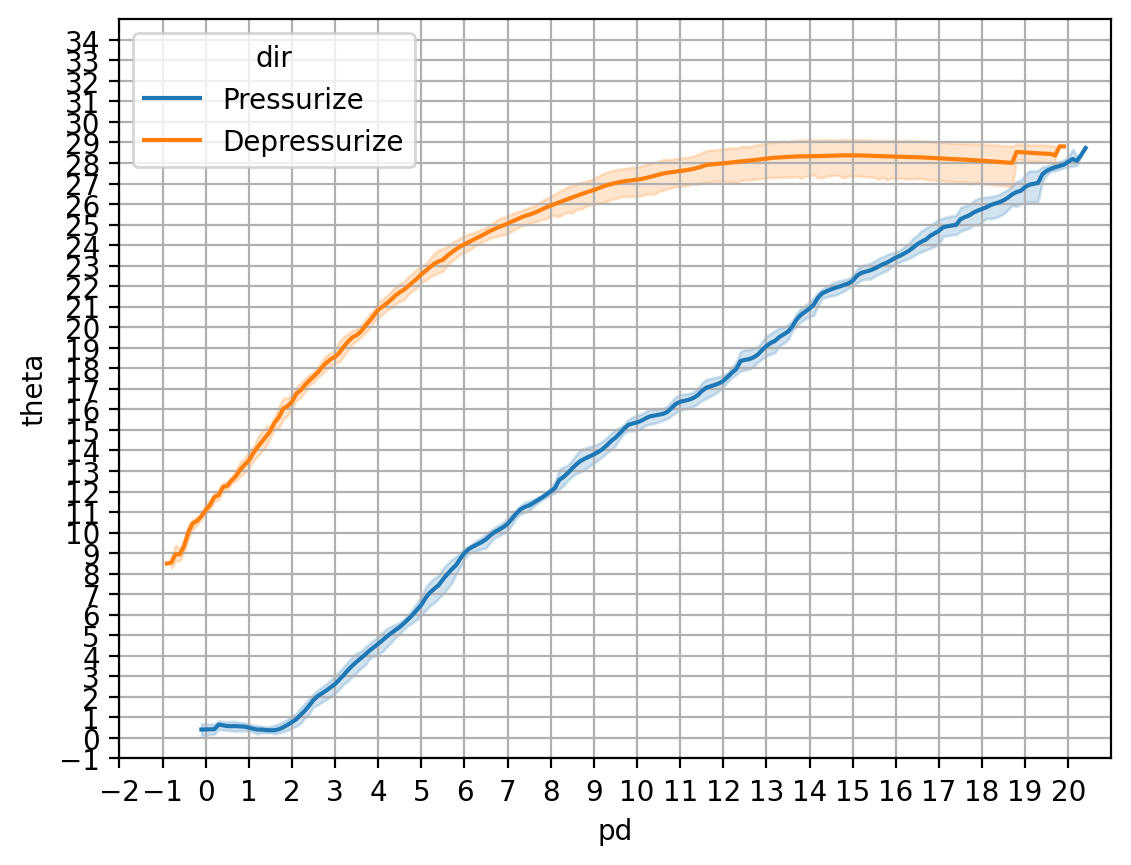

In [10]:

module = 1

all_data = {"pd": [], "theta": [], "dir": []}
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

time_press = []
time_depress = []

for j in range(5):
    if module == 1:
        df = pd.read_csv(m1_data_files[j])
        mod_pfx = "M1"
        marker = "5"
    elif module == 2:
        df = pd.read_csv(m2_data_files[j])
        mod_pfx = "M2"
        marker = "10"
    
    
    for i in range(2):
        if i == 0:
            valve = mod_pfx + "-AR-IN"
            direction = "Pressurize"
        else:
            valve = mod_pfx + "-AR-OUT"
            direction = "Depressurize"
    
        groups = df[df[valve] == True].groupby((df[valve] != True).cumsum()).groups
        on_data_idxs = max(groups.values(), key=len)
        on_data = df.iloc[on_data_idxs]
        if i == 0:
            full_time = on_data["TIME"].iloc[-1] - on_data["TIME"].iloc[0]
            time_press.append(full_time)
        else:
            adjusted_on_data = on_data[(on_data[mod_pfx + "-PR"] - on_data[mod_pfx + "-PL"]) > -0.5]
            #print(on_data)
            print(adjusted_on_data["TIME"].iloc[0], adjusted_on_data["TIME"].iloc[0])
            print(adjusted_on_data)
            full_time = adjusted_on_data["TIME"].iloc[-1] - on_data["TIME"].iloc[0]
            time_depress.append(full_time)

        #print(len(on_data_idxs))

    
        pd_data = list((on_data[mod_pfx + "-PR"] - on_data[mod_pfx + "-PL"]).to_numpy())
        if module == 1:
            ratio_data = on_data["M" + marker + "X"].div(on_data["M" + marker + "Y"]).abs()
        elif module == 2:
            ratio_data = on_data["M" + marker + "X"].div(on_data["M" + marker + "Y"] - on_data["M5Y"]).abs()

        theta_data = list(np.degrees(np.arctan(ratio_data)).to_numpy())

        # is_sorted = all(a <= b for a, b in zip(pd_data, pd_data[1:]))

        interp_func = interp1d(pd_data, theta_data)


        new_pd_data = []
        # if j == 3:
        #     print(min(pd_data))
        #     print(max(pd_data))
        #     print(get_minvalue(pd_data))
        #     print(on_data_idxs[get_minvalue(pd_data)])
        #     print(df[mod_pfx + "-PR"][get_minvalue(pd_data)], df[mod_pfx + "-PL"][get_minvalue(pd_data)])
        start = round_up(min(pd_data),1)
        end = round_down(max(pd_data),1)
        x = start
        while x <= end:
            new_pd_data.append(x)
            x += 0.1
            x = round(x, 1)
        #print(start)
        #print(end)
        #print(new_pd_data[0], new_pd_data[-1])
        new_pd_data = np.array(new_pd_data)

        #new_pd_data = np.arange(math.ceil(min(pd_data)), math.floor(max(pd_data)), 1)

        new_theta_data = interp_func(new_pd_data)

        new_pd_data = list(new_pd_data)
        new_theta_data = list(new_theta_data)
        dir_list = [direction] * len(new_pd_data)
        
        all_data["pd"] += new_pd_data
        all_data["theta"] += new_theta_data
        all_data["dir"] += dir_list


print(time_press)
print(time_depress)
print("Average Pressurization Mod " + str(module) + ": " + str(sum(time_press) / len(time_press)))
print("Average depressurization Mod " + str(module) + ": " + str(sum(time_depress) / len(time_depress)))

all_data_df = pd.DataFrame.from_dict(all_data)
#sns.lineplot(x=pd_data_list[0], y=theta_data_list[0])
ax = sns.lineplot(data=all_data_df, x="pd", y="theta", hue="dir")
ax.set_ylim(-1, 35)
ax.set_xlim(-2, 21)
ax.set_xticks(np.arange(-2, 21, 1.0))
ax.set_yticks(np.arange(-1, 35, 1.0))
plt.grid()
plt.savefig("/Users/davidnull/phd/papers/Robosoft-23/Revisions/module_" + str(module) + "_fig5.png")

#plt.plot(pd_data_list[0], theta_data_list[0])
#plt.plot(pd_data_list[1], theta_data_list[1])
#plt.xlim((-2,22))
#plt.ylim((-1,31))
#plt.title("Module Curves")
#plt.xlabel("Pressure Differnce (kPa)")
#plt.ylabel("Angle from Vertical (degrees)")
